Dự báo giá nhà dựa trên các thông tin thông tin quan trọng về nhà. Dựa vào các mô hình hồi quy tuyến tính, hồi quy tuyến tính Ridge, hồi quy Laso, và hồi quy k lân cận gần nhất.

## Dữ liệu

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [194]:
data=pd.read_csv("Montreal.csv")
data.head()


,not_sold,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,emergency_shelters,emergency_water,Facilities,fire_stations,Cultural,Monuments,police_stations,Vacant,Free_Parking,askprice
0,1,0,0,0,0,0,0,0,0,0,...,37,274,210,43,71,43,25,43,52,166000
1,1,0,0,0,0,0,0,0,0,0,...,19,120,1,15,24,5,7,0,4,349000
2,1,0,0,0,0,0,0,0,0,0,...,27,191,155,28,54,32,18,19,43,224900
3,1,0,0,0,0,0,0,0,0,0,...,10,82,0,13,10,2,5,0,1,585000
4,1,0,0,0,0,0,0,0,0,0,...,30,238,216,37,66,42,20,43,52,312900


In [44]:
data.shape

(9717, 40)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9717 entries, 0 to 9716
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   not_sold              9717 non-null   int64  
 1   2014                  9717 non-null   int64  
 2   2013                  9717 non-null   int64  
 3   2012                  9717 non-null   int64  
 4   2011                  9717 non-null   int64  
 5   2010                  9717 non-null   int64  
 6   2009                  9717 non-null   int64  
 7   2008                  9717 non-null   int64  
 8   2007                  9717 non-null   int64  
 9   2006                  9717 non-null   int64  
 10  2005                  9717 non-null   int64  
 11  2004                  9717 non-null   int64  
 12  2003                  9717 non-null   int64  
 13  2002                  9717 non-null   int64  
 14  num_bed               9717 non-null   float64
 15  year_built           

## Xử lý dữ liệu với các giá trị missing
- Loại bỏ các bản ghi có giá trị missing
- Khôi phục giá trị mising bằng giá trị trung bình

In [46]:
features = list(data.columns)

In [47]:
features[0] # Thuộc tính not_sold, 1 chưa bán, 0 đã bán

'not_sold'

In [48]:
features[1:14]# Các thuộc tính bán năm 2002-> 2014: 1 năm bán

['2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002']

In [49]:
features[14:16]# Số giường, năm xây dựng

['num_bed', 'year_built']

In [50]:
features[16:18]# Tọa độ

['longitude', 'latitude']

In [51]:
features[18:21]# Số phòng, số phòng tắm, diện tích

['num_room', 'num_bath', 'living_area']

In [52]:
features[21:26]# Tính chất bất động sản

['house', 'plex', 'chalet', 'loft', 'condo']

In [53]:
features[26:30]

['num_parking', 'accessible_buildings', 'family_quality', 'art_expos']

In [54]:
features[30:35]

['emergency_shelters',
 'emergency_water',
 'Facilities',
 'fire_stations',
 'Cultural']

In [55]:
features[35:39]

['Monuments', 'police_stations', 'Vacant', 'Free_Parking']

In [56]:
features[39] # Giá tài sản

'askprice'

Các biến phụ thuộc **39**, biến dự báo **1** 

### Dự báo giá nhà với dữ liệu data_removal (bỏ các bản ghi lỗi)
- Dữ liệu data_removal
- Chia dữ liệu thành dữ liệu huấn luyện (70%) và dữ liệu kiểm tra (30%)

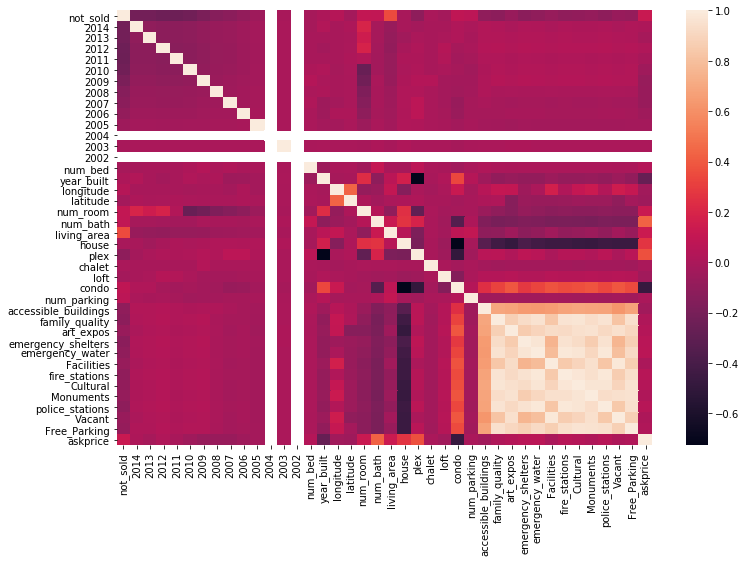

In [57]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

### Note: 
- y gets high correlation with flex, house, living_area, num_bathroom, num_room, not_sold

Xây dựng mô hình dự đoán.

In [58]:
def drop_binomial(X):
    X_new = pd.DataFrame()

    for _ in range(X.shape[1]):
        if X.iloc[: , _].unique().size != 2:
            X_new[X.columns[_]] = X[X.columns[_]]
    return X_new


In [59]:
data = data.dropna()
print(data.shape) # no missing data

(9717, 40)


### Thử với các mẫu đã loại bỏ feature Binomial

In [196]:
X = data.drop('askprice',axis=1)
y = data['askprice']
X

,not_sold,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,art_expos,emergency_shelters,emergency_water,Facilities,fire_stations,Cultural,Monuments,police_stations,Vacant,Free_Parking
0,1,0,0,0,0,0,0,0,0,0,...,209,37,274,210,43,71,43,25,43,52
1,1,0,0,0,0,0,0,0,0,0,...,85,19,120,1,15,24,5,7,0,4
2,1,0,0,0,0,0,0,0,0,0,...,122,27,191,155,28,54,32,18,19,43
3,1,0,0,0,0,0,0,0,0,0,...,21,10,82,0,13,10,2,5,0,1
4,1,0,0,0,0,0,0,0,0,0,...,210,30,238,216,37,66,42,20,43,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,1,0,0,0,0,0,0,0,0,0,...,212,28,232,216,36,63,42,19,43,52
9713,1,0,0,0,0,0,0,0,0,0,...,212,28,232,216,36,63,42,19,43,52
9714,1,0,0,0,0,0,0,0,0,0,...,183,18,154,216,24,48,30,14,43,38
9715,1,0,0,0,0,0,0,0,0,0,...,230,29,204,216,31,57,33,18,43,39


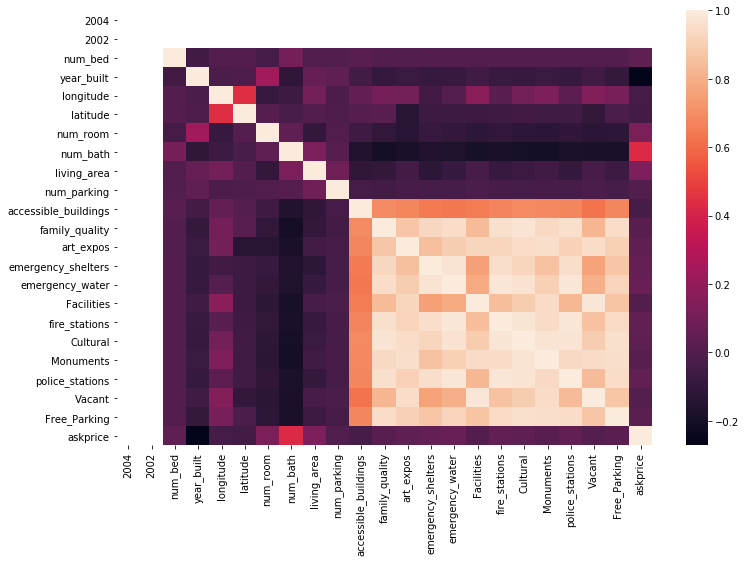

In [61]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(X.corr())

In [62]:
X.drop('askprice', inplace=True, axis=1) # drop askprice


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Baseline model:



In [64]:
lr = linear_model.LinearRegression().fit(X_train, y_train)
print("LR Score: ", lr.score(X_train, y_train))
print("LR Score Test: ", lr.score(X_test, y_test))

rs = linear_model.RANSACRegressor(random_state = 0).fit(X_train, y_train)
print("RANSAC Score: ", rs.score(X_train, y_train))
print("RANSAC Score Test: ", rs.score(X_test, y_test))

Rig = linear_model.Ridge(alpha=.5).fit(X_train, y_train)
print("Rig Score: ", Rig.score(X_train, y_train))
print("Rig Score Test: ", Rig.score(X_test, y_test))

lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
print("Lasso Score: ", lasso.score(X_train, y_train))
print("Lasso Score Test: ", lasso.score(X_test, y_test))

LR Score:  0.3224576546772264
LR Score Test:  0.29923550201992877
RANSAC Score:  -20.099713139428633
RANSAC Score Test:  -1.0720696991518621
Rig Score:  0.3224575555179917
Rig Score Test:  0.2992873530516823
Lasso Score:  0.3224381067892643
Lasso Score Test:  0.2991961396701359


C:\Users\Hoang Viet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35683290313429.914, tolerance: 10533761816.548637
  positive)


### simple regression with ['living_area']

In [65]:
lr = linear_model.LinearRegression().fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("LR Score: ", lr.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("LR Score Test: ", lr.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

rs = linear_model.RANSACRegressor(random_state = 0).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("RANSAC Score: ", rs.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("RANSAC Score Test: ", rs.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

Rig = linear_model.Ridge(alpha=.5).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("Rig Score: ", Rig.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("Rig Score Test: ", Rig.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

lasso = linear_model.Lasso(alpha=0.1).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("Lasso Score: ", lasso.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("Lasso Score Test: ", lasso.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

LR Score:  0.021037996651326
LR Score Test:  0.01051725935815162
RANSAC Score:  -0.3242183128572034
RANSAC Score Test:  -0.3127388247437679
Rig Score:  0.021037996651326
Rig Score Test:  0.010517259364625775
Lasso Score:  0.021037996651326
Lasso Score Test:  0.01051725947886506


### Note: Vì các mô hình đều cho score sấp xỉ nhau và khá thấp . Nên ta chọn Model có score lớn nhất -> Linear Reg

### Thử mô hình với tất cả các independent feature:


In [66]:
from sklearn.linear_model import Ridge, Lasso

X = data.iloc[:, :39]
y = data['askprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


ridge = Ridge(alpha=0.1, normalize=True).fit(X_train, y_train)
ypre_train = ridge.predict(X_train)
ypre_test = ridge.predict(X_test)


### Đánh giá mô hình

In [67]:
from sklearn.metrics import r2_score

print("r2 test: ", r2_score(y_test, ypre_test))
print("r2 train: ", r2_score(y_train, ypre_train))


r2 test:  0.4748469072496796
r2 train:  0.49157821845676175


> note: Mô hình cho dữ liệu khá tốt. nên ta chọn Model này để dự đoán. 

## Trực quan mô hình với simple linear regression:


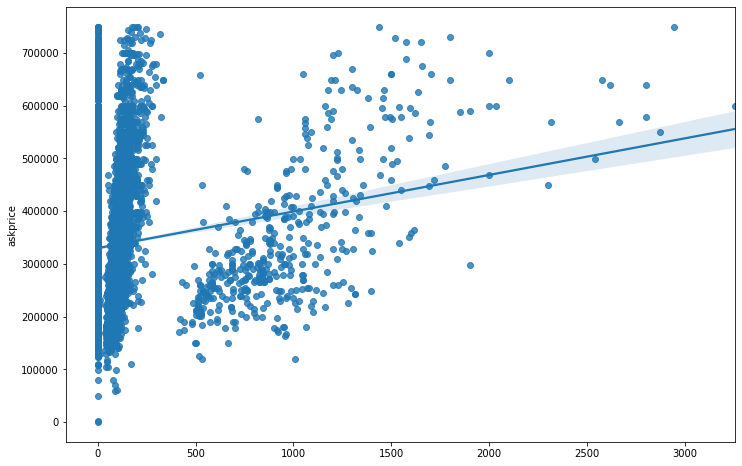

In [68]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.living_area.values.reshape(1, -1).T, y_train)

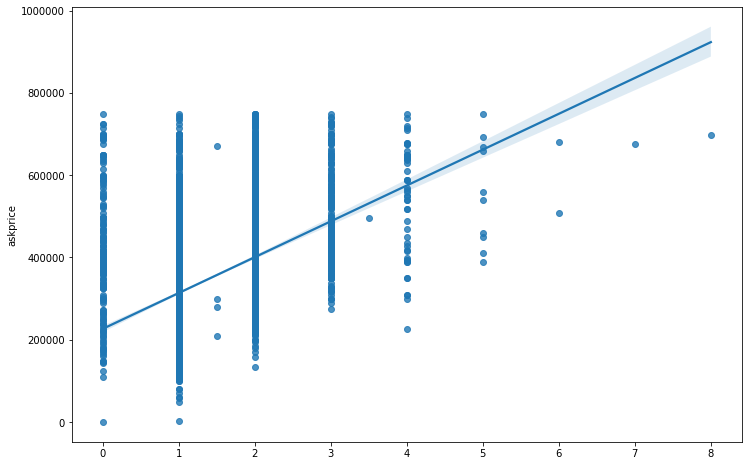

In [69]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.num_bath.values.reshape(1, -1).T, y_train)


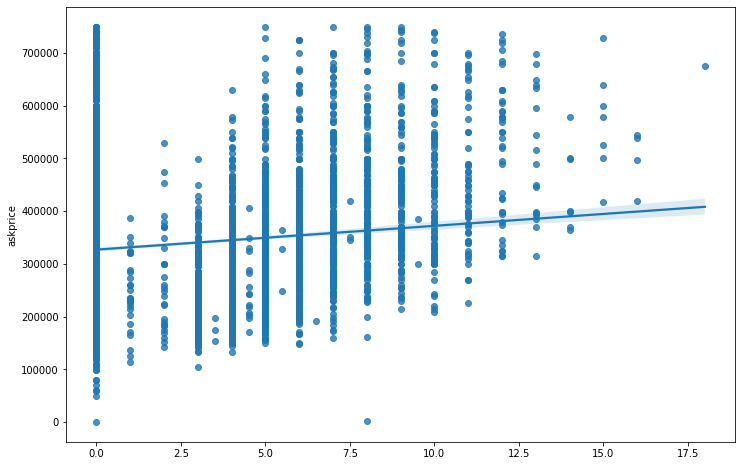

In [70]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.num_room.values.reshape(1, -1).T, y_train)

## Trực quan mô hình với Multiple feature linear regression:

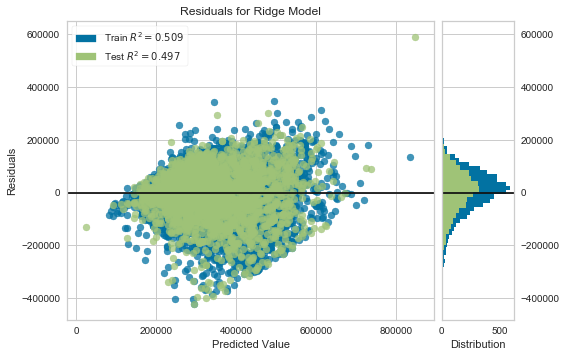

In [71]:
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Processing : 


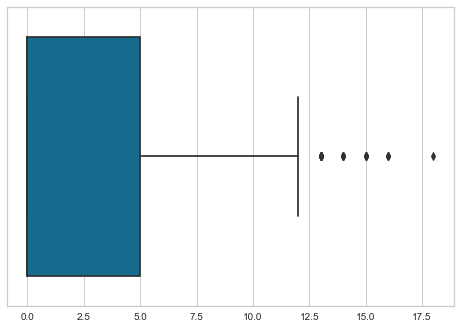

In [72]:
sns.boxplot(X_train.num_room.values.reshape(1, -1).T)

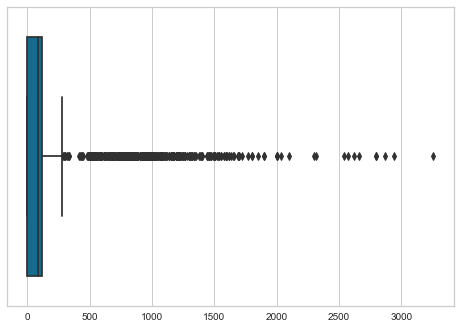

In [73]:
sns.boxplot(X_train.living_area.values.reshape(1, -1).T)

### note: Còn nhiều nhiễu cần được xử lý. 


In [141]:
from scipy import stats
import numpy as np
data = data[['living_area', 'house', 'askprice']]
z = np.abs(stats.zscore(data))
print(z)

[[0.28557742 0.53208181 1.35321791]
 [0.08504357 0.53208181 0.08051653]
 [0.12218092 0.53208181 0.89175912]
 ...
 [2.46125449 0.53208181 0.38956033]
 [3.1820638  0.53208181 0.43395126]
 [0.01481202 0.53208181 1.2557087 ]]


In [120]:
threshold = 3
print(np.where(z > threshold))

(array([8855, 8857, 8872, 8881, 8883, 8886, 8887, 8893, 8897, 8908, 8912,
       8914, 8922, 8924, 8928, 8935, 8938, 8941, 8942, 8946, 8950, 8957,
       8966, 8969, 8975, 8980, 8981, 8985, 8987, 8988, 8993, 8999, 9001,
       9002, 9017, 9019, 9023, 9024, 9028, 9032, 9039, 9040, 9041, 9045,
       9046, 9047, 9049, 9051, 9052, 9053, 9054, 9055, 9057, 9058, 9059,
       9060, 9062, 9063, 9064, 9065, 9066, 9068, 9069, 9076, 9077, 9078,
       9081, 9085, 9087, 9088, 9089, 9090, 9091, 9093, 9095, 9099, 9103,
       9105, 9106, 9107, 9108, 9109, 9110, 9111, 9113, 9115, 9118, 9119,
       9122, 9124, 9131, 9132, 9133, 9135, 9136, 9138, 9141, 9143, 9148,
       9149, 9151, 9154, 9155, 9158, 9159, 9160, 9162, 9164, 9165, 9169,
       9171, 9174, 9178, 9181, 9182, 9183, 9184, 9187, 9190, 9191, 9192,
       9193, 9194, 9195, 9197, 9200, 9204, 9207, 9210, 9212, 9214, 9217,
       9219, 9220, 9221, 9222, 9223, 9224, 9228, 9230, 9234, 9236, 9242,
       9243, 9245, 9248, 9249, 9250, 9251, 9252, 9

In [142]:
data_o = data[(z < 3).all(axis=1)]

In [143]:
data.shape

(9717, 3)

In [144]:
data_o.shape

(9331, 3)

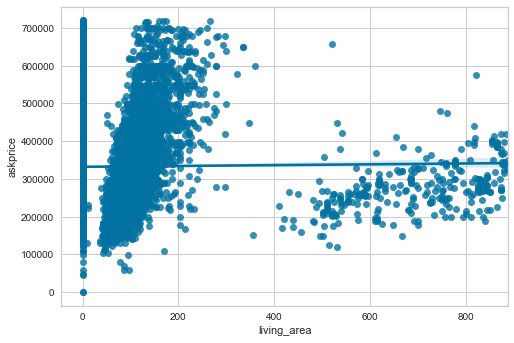

In [145]:
sns.regplot(data_o['living_area'], data_o['askprice'])

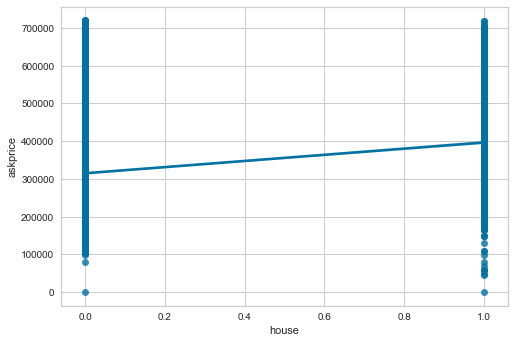

In [146]:
sns.regplot(data_o['house'], data_o['askprice'])

In [150]:
X = data.drop('askprice', axis =1)
y = data['askprice']


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [152]:
lr = linear_model.LinearRegression().fit(X_train, y_train)

In [155]:
lr.score(X_train, y_train)

0.089171685764455

In [198]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for i in range(1, 1000, 1):
    neigh = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    score.append([neigh.score(X_train, y_train)])
    print(neigh.score(X_train, y_train), i)

0.9988977309351006 1
0.8135294118387041 2
0.7356508544664353 3
0.69634047369783 4
0.667328077234639 5
0.6440423272421276 6
0.6260482756604024 7
0.6136633189786973 8
0.6031839679209965 9
0.5918208564813185 10
0.5827585512425256 11
0.5747960480744274 12
0.5666737052113838 13
0.5605860720921869 14
0.5563728529545082 15
0.5513385274057969 16
0.5473706900795977 17
0.5428750894146197 18
0.539801998388312 19
0.5343809865590312 20
0.531774338770797 21
0.5280375996165974 22
0.523275871427727 23
0.5199276043460357 24
0.5166144187788075 25
0.5133683807128886 26
0.5113530548533476 27
0.5078482481926556 28
0.5056532017375842 29
0.5025454512484406 30
0.5007814657265652 31
0.4991760135537193 32
0.49673705663108153 33
0.4940481152345356 34
0.4921512351264644 35
0.4903227045208458 36
0.4888038015045084 37
0.4870737055079128 38
0.48608205251865644 39
0.4841687423101394 40
0.48280919991211535 41
0.48164627901805107 42
0.4800558030265516 43
0.47773857722966573 44
0.4751786758180425 45
0.473207235129795 46

KeyboardInterrupt: 

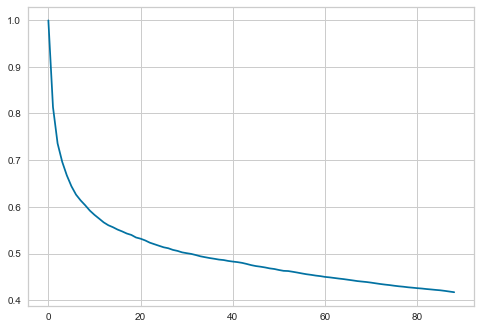

In [200]:
plt.plot(score)